In [2]:
import numpy as np # for working with numpy arrays
import filetype #loading selected filetype into memory
import matplotlib.pyplot as plt # plotting
import os #directory traveral
import cv2 # reading the image files as arrays
import shutil #copying files and saving image files

In [ ]:
DATADIR= "C:/Users/moham/Desktop/breast cancer dataset/"
CATEGORIES = ["Benign","Cancer","Normal"]
IMG_SIZE=250
training_data = []


def create_training_data():
    countB=0
    countC=0
    countN=0
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            if img.lower().find('mask')==-1:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            else:
                mk_array = cv2.imread(os.path.join(path,img))
                mask_aray = cv2.resize(mk_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array, class_num, mask_array, str(img)])
            if class_num==0:
                countB+=1
            elif class_num==1:
                countC+=1
                if countC==countB:
                    break
            elif class_num==2:
                countN+=1
                if countN==countB:
                    break
    print(countB)
    print(countC)
    print(countN)


create_training_data()



In [ ]:
for img,mask in zip(training_data,training_Maskdata):
    print(type(img))
    masked = cv2.bitwise_and(img,mask)
    plt.imshow(masked)


In [ ]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

In [ ]:
print(len(training_data))

In [ ]:
import random
random.shuffle(training_data)

In [2]:
X = []
y = []

In [3]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE, 3)
y=np.array(y)

In [4]:
print(len(y))
print(len(X))

import pickle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()


pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

4206
4206


In [1]:
import pickle

X_train= pickle.load(open("X_train.pickle","rb"))
y_train = pickle.load(open("y_train.pickle","rb"))

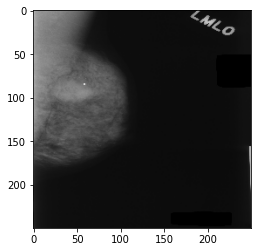

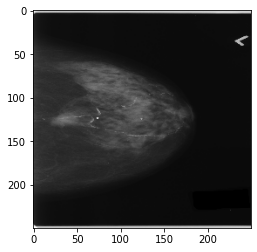

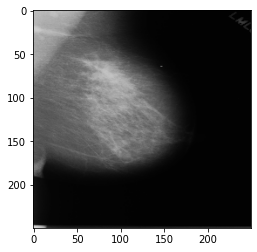

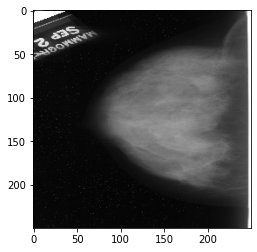

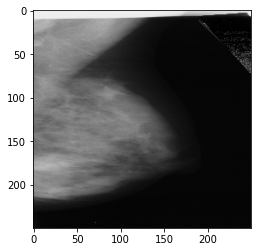

Training benigns  1122
Training Cancer 1121
Training normal 1121


In [2]:
import cv2
import matplotlib.pyplot as plt
for npimage in X_train[0:5]:
    plt.imshow(npimage, cmap="gray")
    plt.show()
num0s_TR=0
num1s_TR=0
num2s_TR=0
num0s_TE=0
num1s_TE=0
num2s_TE=0
for i in y_train:
    if i == 0:
       num0s_TR+=1
    elif i == 1:
        num1s_TR +=1
    elif i == 2:
        num2s_TR +=1
    else:
        print("non classified")
# for i in y_test:
#     if i == 0:
#        num0s_TE+=1
#     elif i == 1:
#         num1s_TE +=1
#     elif i == 2:
#         num2s_TE +=1
#     else:
#         print("non classified")

print ("Training benigns " ,num0s_TR )
print("Training Cancer", num1s_TR)
print("Training normal", num2s_TR)

# print ("Testing benigns " ,num0s_TE )
# print("Testing Cancer", num1s_TE)
# print("Testing normal", num2s_TE)

In [1]:

import numpy as np
import filetype
import matplotlib.pyplot as plt
import os
import cv2
import shutil

In [2]:
DATADIR= "C:/Users/moham/Desktop/images with masks/cropped images"
CATEGORIES = ["Benign","Cancer","Normal"]
IMG_SIZE=224
training_data = []


def create_training_data():
    countB=0
    countC=0
    countN=0
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array, class_num])
            if class_num==0:
                countB+=1
            elif class_num==1:
                countC+=1
                if countC==countB:
                    break
            elif class_num==2:
                countN+=1
                if countN==countB:
                    break
    print(countB)
    print(countC)
    print(countN)


create_training_data()

1402
1402
1402


In [3]:
print(len(training_data))

4206


In [4]:

X = []
y = []

In [5]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE, 3)
y=np.array(y)

In [6]:
import pickle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

pickle_out = open("Datasets/cropped224/X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()


pickle_out = open("Datasets/cropped224/X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Datasets/cropped224/y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("Datasets/cropped224/y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

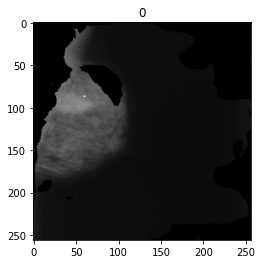

In [7]:
for image,label in zip(X_train,y_train):
    plt.imshow(image)
    plt.title(label)
    plt.show()
    break

In [2]:
DATADIR= "C:/Users/moham/Desktop/binaryForNorm/images"
CATEGORIES = ["BenignNCancer","Normal"]
IMG_SIZE=250
training_data = []


def create_training_data():
    countBnC=0
    countN=0
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array, class_num])
            if class_num==0:
                countBnC+=1
                if countBnC==2408:
                    break
            elif class_num==1:
                countN+=1

create_training_data()

In [3]:
print(len(training_data))

4816


In [4]:

X = []
y = []

In [5]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE, 3)
y=np.array(y)

In [6]:
import pickle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

pickle_out = open("Datasets/binaryFormNorm/X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()


pickle_out = open("Datasets/binaryFormNorm/X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Datasets/binaryFormNorm/y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("Datasets/binaryFormNorm/y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [4]:
DATADIR= "C:/Users/moham/Desktop/benVCan/"
CATEGORIES = ["Benign","Cancer"]
IMG_SIZE=250
training_data = []


def create_training_data():
    countB=0
    countC=0
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array, class_num])
            if class_num==0:
                countB+=1
                if countB==1402:
                    break
            elif class_num==1:
                countC+=1
                if countC==1402:
                    break

create_training_data()

In [5]:
print(len(training_data))

2804


In [6]:

X = []
y = []

In [7]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE, 3)
y=np.array(y)

In [8]:
import pickle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

pickle_out = open("Datasets/benVCan/X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()


pickle_out = open("Datasets/benVCan/X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Datasets/benVCan/y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("Datasets/benVCan/y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()